<a href="https://colab.research.google.com/github/byrneap23/FinalProject/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Our coding project is an extension of a simple monte carlo problem that says this:

"The chances of rolling double sixes using 2 standard 6 sided die is a 1/36 chance, or 2.77%. However, if you roll these 2 dice 24 times, the chances of rolling double sixes goes up to 49.1%. A monte carlo simulation can help approximate this and multiple changes can be made to the game including the number of sides on the die and the number of rolls in one trial."

In this dice game, a player will be given a percentage that they must get within 1% of. The first numbers they will input will be the numbers that they
want each die to display to be given a 'win' for that trial (easiest choices are doubles of a specific number).

Since this is a dice game, there has to be difficulties within it (easy, medium, hard). After trial and error, we concluded the best way to set a "difficulty" was to have
the player input their number of monte carlo trials. We came to this conclusion with the observation that the more trials you have (ex. 10000), the more accurate the simulated
probability will be, thus the smaller difference between the simulated and actual probabilities.

***Note***: With the smaller number of trials (hard mode), there will be times where you can't achieve the desired probability even with changing the number of rolls by 1. If this
happens, continue to enter the same number for rolls and sides and try again.

With the 'game code', the user's first attempt will have them input how many sides will be on each die (ex: standard 6 sided die, d20) with a
number corresponding to each side starting with 1 (1-6 for a standard die, 1-20 for a d20). After inputting the number of sides on the die, the player will input how many rolls
they would like to happen. This is the number of rolls in 1 of the monte carlo trials (i.e. 10 rolls is a total of rolling 2 dice 1000 times).

It will then output the probability that this scenario will happen as seen in the example problem above. The probability will be a ratio of the number
of trials where the two values were rolled out of the total number of trials (that being 100). Over time, the user will be able to change either the number of sides
on the dice or the number of rolls in one trial to get their probability closer to the target (they can technically change both, but we don't recommend that due to the volatility
it creates with their probailities).


In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# The user is given the probability to achieve within 3%
int_target = random.randint(1, 100)
print(f"Your target percentage to get within 3% of is {int_target}%.")
target = int_target

# User sets fixed target dice values (cannot change later)
sides = int(input("Please enter the number of sides you would like on the die: "))
d1_value = int(input("Enter what die number you want on the first die (this can't be changed after entered and must be <= the number of sides input): "))
d2_value = int(input("Enter what die number you want on the second die (this can't be changed after entered and must be <= the number of sides input): "))

# Fixed number of Monte Carlo trials
numTrials = int(input("Enter how many trials you want the simulation to occur in multiples of 10 (Hint: less trials will make the game more difficult): "))

Your target percentage to get within 3% of is 26%.
Please enter the number of sides you would like on the die: 6
Enter what die number you want on the first die (this can't be changed after entered and must be <= the number of sides input): 6
Enter what die number you want on the second die (this can't be changed after entered and must be <= the number of sides input): 6
Enter how many trials you want the simulation to occur in multiples of 10 (Hint: less trials will make the game more difficult): 1000



Attempt #1
Please enter the total number of rolls you want to happen: 15
Simulated Probability: 33.00%
Theoretical Probability: 34.46%
Sorry, your probability of 33.00% is not within 3% of the target (26%).
Trying again...

Attempt #2
Please enter the total number of rolls you want to happen: 12
Simulated Probability: 28.80%
Theoretical Probability: 28.68%
Congrats! Your probability of 28.80% is within 3% of the target (26%)!


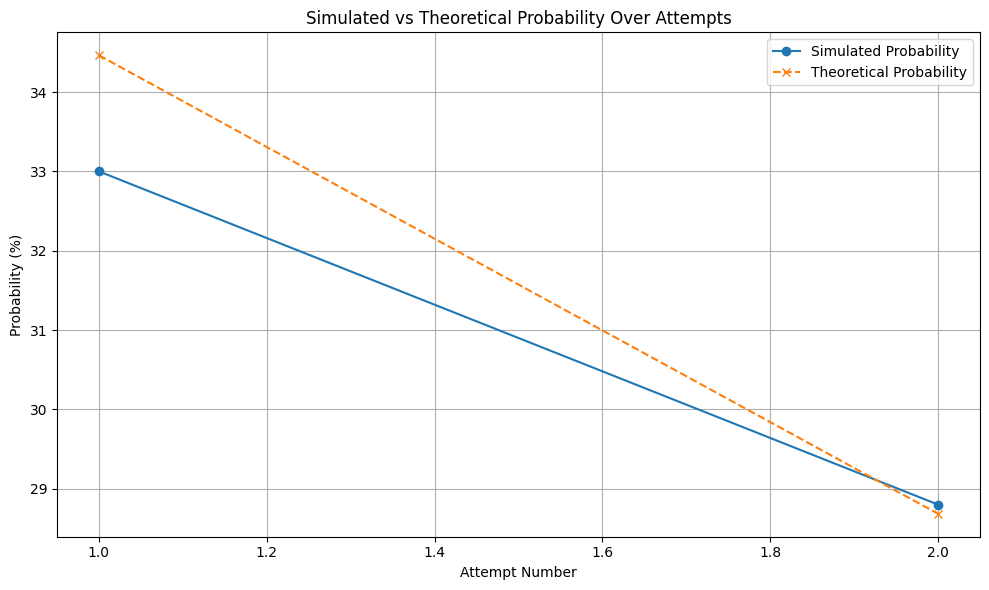

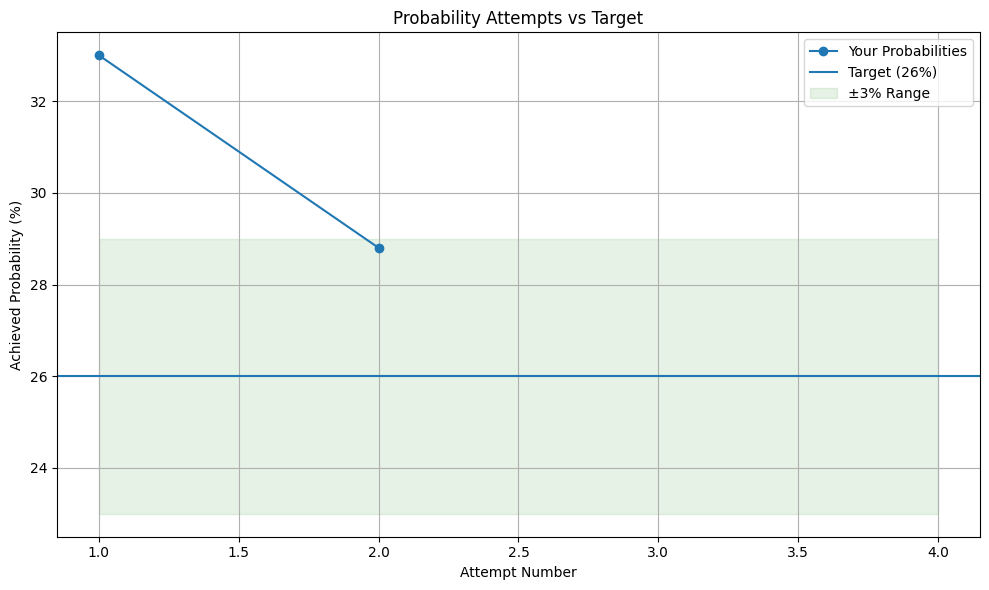

In [3]:
# Die rolling function
def rollDie(sides):
    return random.randint(1, sides)

# Simulation function: also returns trial-wise success list
def MonteProb(rolls, d1_value, d2_value, sides):
    numwins = 0.0
    wins_per_trial = []

    for i in range(numTrials):
        success = False
        for j in range(rolls):
            d1 = rollDie(sides)
            d2 = rollDie(sides)
            if d1 == d1_value and d2 == d2_value:
                numwins += 1
                success = True
                break
        wins_per_trial.append(1 if success else 0)

    prob = (numwins / numTrials) * 100
    return prob, wins_per_trial

# Function to calculate actual theoretical probability
def actual_probability(rolls, sides):
    p_match = (1 / sides) * (1 / sides)  # chance for one roll
    actual = 1 - (1 - p_match) ** rolls  # chance of at least one match
    return actual * 100
# Track attempt number, simulated and actual probabilities
attempt = 1
simulated_history = []
actual_history = []

# Loop until success
while True:
    print(f"\nAttempt #{attempt}")
    rolls = int(input("Please enter the total number of rolls you want to happen: "))

    prob, last_wins_per_trial = MonteProb(rolls, d1_value, d2_value, sides)
    actual_prob = actual_probability(rolls, sides)

    simulated_history.append(prob)
    actual_history.append(actual_prob)

    print(f"Simulated Probability: {prob:.2f}%")
    print(f"Theoretical Probability: {actual_prob:.2f}%")

    if abs(prob - target) <= 3:
        print(f"Congrats! Your probability of {prob:.2f}% is within 3% of the target ({target}%)!")
        break
    else:
        print(f"Sorry, your probability of {prob:.2f}% is not within 3% of the target ({target}%).")
        print("Trying again...")
        attempt += 1

# Line Graph: Simulated vs Actual Probability
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Simulated Probability")
plt.plot(range(1, attempt + 1), actual_history, marker='x', linestyle='--', label="Theoretical Probability")
plt.title("Simulated vs Theoretical Probability Over Attempts")
plt.xlabel("Attempt Number")
plt.ylabel("Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting after success
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Your Probabilities")
plt.axhline(y=target, linestyle='-', label=f"Target ({target}%)")
plt.fill_between(range(1, attempt + 3), target - 3, target + 3, color='green', alpha=0.1, label="±3% Range")

plt.title("Probability Attempts vs Target")
plt.xlabel("Attempt Number")
plt.ylabel("Achieved Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We now will use the code from before and run this simulation using 3 dice!

In [4]:
# The user is given the probability to achieve within 3%
int_target = random.randint(2, 100)
print(f"Your target percentage to get within 3% of is {int_target}%.")
target = int_target

# User sets fixed target dice values (cannot change later)
sides = int(input("Enter the number of sides on each die: "))
d1_value = int(input("Enter the number you want on the first die (can't be changed and must be <= the number of sides input): "))
d2_value = int(input("Enter the number you want on the second die (can't be changed and must be <= the number of sides input): "))
d3_value = int(input("Enter the number you want on the third die (can't be changed and must be <= the number of sides input): "))

# Fixed number of Monte Carlo trials
numTrials = int(input("Enter how many trials you want the simulation to occur in multiples of 10 (Hint: less trials will make the game more difficult): "))


Your target percentage to get within 3% of is 99%.
Enter the number of sides on each die: 2
Enter the number you want on the first die (can't be changed and must be <= the number of sides input): 1
Enter the number you want on the second die (can't be changed and must be <= the number of sides input): 1
Enter the number you want on the third die (can't be changed and must be <= the number of sides input): 1
Enter how many trials you want the simulation to occur in multiples of 10 (Hint: less trials will make the game more difficult): 10000



Attempt #1
Enter the number of rolls per trial: 100
Simulated Probability: 100.00%
Theoretical Probability: 100.00%
Success! Your simulated probability of 100.00% is within 3% of the target (99%).


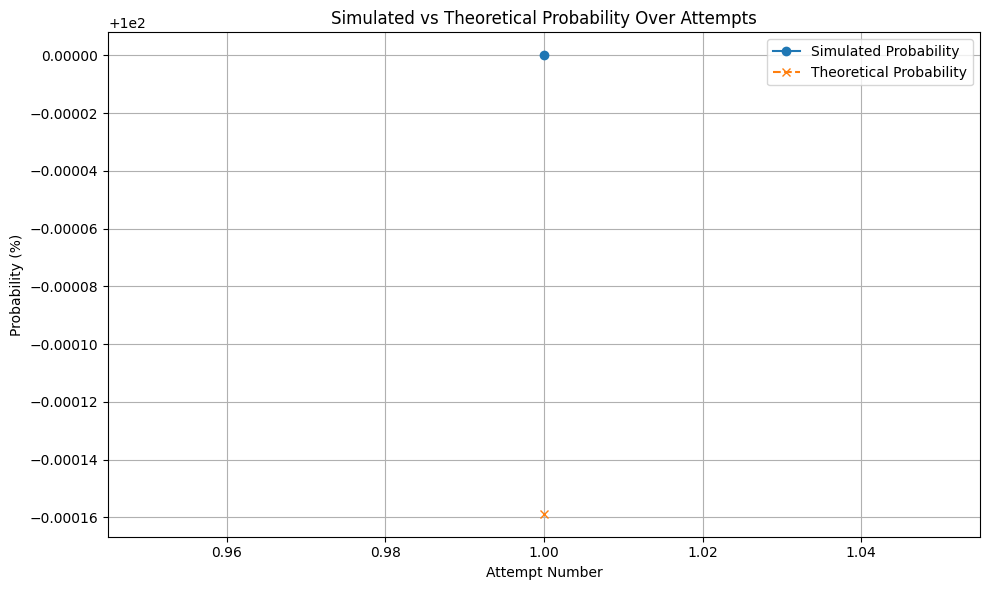

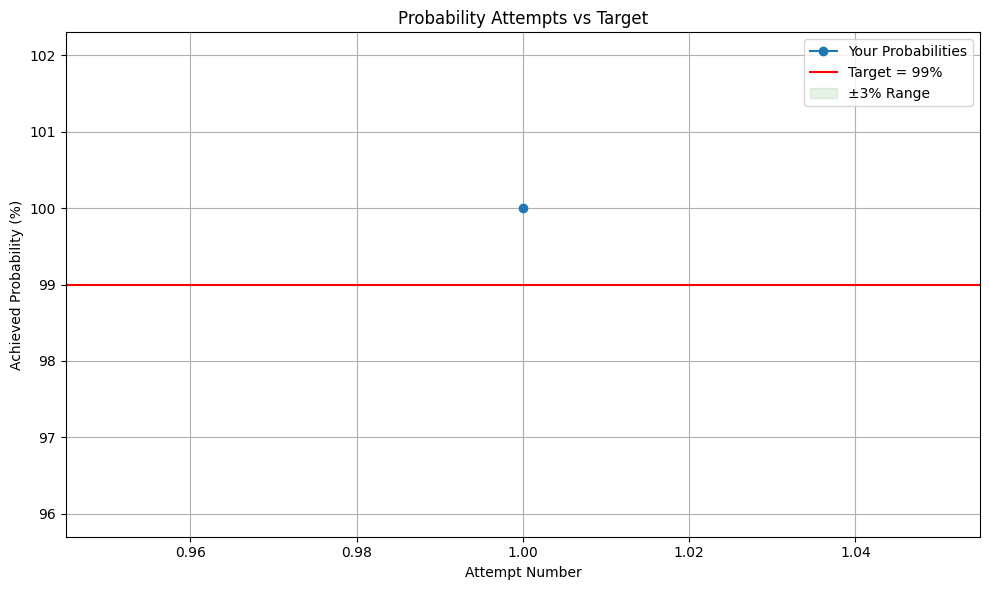

In [5]:
# Die rolling function
def rollDie(sides):
    return random.randint(1, sides)

# Simulation: match d1, d2, d3 in a single roll
def MonteProb(rolls, d1_value, d2_value, d3_value, sides):
    numwins = 0.0
    wins_per_trial = []

    for _ in range(numTrials):
        success = False
        for _ in range(rolls):
            d1 = rollDie(sides)
            d2 = rollDie(sides)
            d3 = rollDie(sides)
            if d1 == d1_value and d2 == d2_value and d3 == d3_value:
                numwins += 1
                success = True
                break
        wins_per_trial.append(1 if success else 0)

    prob = (numwins / numTrials) * 100
    return prob, wins_per_trial

# Theoretical probability for 3 fixed values
def actual_probability(rolls, sides):
    p_match = (1 / sides) ** 3  # probability all three match in one roll
    actual = 1 - (1 - p_match) ** rolls  # at least one match in rolls
    return actual * 100

# Tracking attempt data
attempt = 1
simulated_history = []
actual_history = []

# Loop until success
while True:
    print(f"\nAttempt #{attempt}")
    rolls = int(input("Enter the number of rolls per trial: "))
    prob, _ = MonteProb(rolls, d1_value, d2_value, d3_value, sides)
    actual_prob = actual_probability(rolls, sides)

    simulated_history.append(prob)
    actual_history.append(actual_prob)

    print(f"Simulated Probability: {prob:.2f}%")
    print(f"Theoretical Probability: {actual_prob:.2f}%")

    if abs(prob - target) <= 3:
        print(f"Success! Your simulated probability of {prob:.2f}% is within 3% of the target ({target}%).")
        break
    else:
        print(f"Sorry, your probability of {prob:.2f}% is not within 3% of the target ({target}%).")
        attempt += 1

# Graph 1: Simulated vs Theoretical Probability
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Simulated Probability")
plt.plot(range(1, attempt + 1), actual_history, marker='x', linestyle='--', label="Theoretical Probability")
plt.title("Simulated vs Theoretical Probability Over Attempts")
plt.xlabel("Attempt Number")
plt.ylabel("Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 2: Attempts vs Target Range
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Your Probabilities")
plt.axhline(y=target, color='red', linestyle='-', label=f"Target = {target}%")
plt.fill_between(range(1, attempt + 1), target - 3, target + 3, color='green', alpha=0.1, label="±3% Range")
plt.title("Probability Attempts vs Target")
plt.xlabel("Attempt Number")
plt.ylabel("Achieved Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

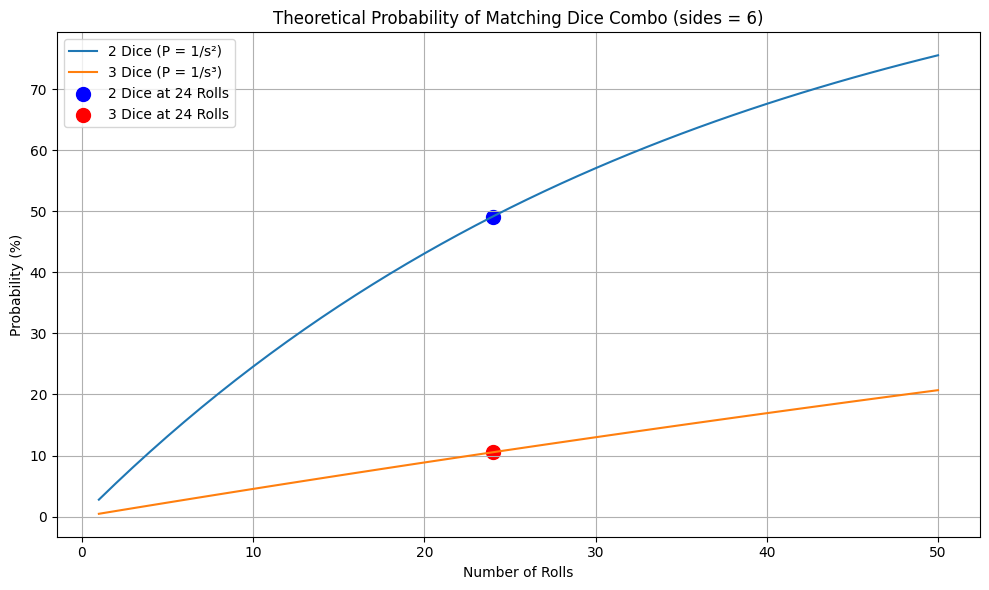

In [6]:
def theoretical_prob(num_dice, rolls, sides):
    #Calculate the probability of matching a fixed combination for num_dice
    p_single = (1 / sides) ** num_dice
    return [100 * (1 - (1 - p_single) ** r) for r in rolls]

# Parameters
sides = 6
max_rolls = 50
highlight_roll = 24
rolls_range = list(range(1, max_rolls + 1))

# Compute theoretical probabilities
prob_2dice = theoretical_prob(2, rolls_range, sides)
prob_3dice = theoretical_prob(3, rolls_range, sides)

# Getting Values at Roll 24
prob_2_at_24 = prob_2dice[highlight_roll - 1]
prob_3_at_24 = prob_3dice[highlight_roll - 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(rolls_range, prob_2dice, label="2 Dice (P = 1/s²)")
plt.plot(rolls_range, prob_3dice, label="3 Dice (P = 1/s³)")
plt.scatter([highlight_roll], [prob_2_at_24], color='blue', s=100, label="2 Dice at 24 Rolls")
plt.scatter([highlight_roll], [prob_3_at_24], color='red', s=100, label="3 Dice at 24 Rolls")
plt.title(f"Theoretical Probability of Matching Dice Combo (sides = {sides})")
plt.xlabel("Number of Rolls")
plt.ylabel("Probability (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Your target percentage to get within 3% of is 38%.
Enter value for first die (≤ 6): 6
Enter value for second die (≤ 6): 6
Enter number of Monte Carlo trials (multiples of 10): 1000

Attempt #1 with 10 rolls
Simulated Probability: 24.10%
Theoretical Probability: 24.55%

Attempt #2 with 11 rolls
Simulated Probability: 26.90%
Theoretical Probability: 26.65%

Attempt #3 with 12 rolls
Simulated Probability: 28.80%
Theoretical Probability: 28.68%

Attempt #4 with 13 rolls
Simulated Probability: 30.10%
Theoretical Probability: 30.67%

Attempt #5 with 14 rolls
Simulated Probability: 32.60%
Theoretical Probability: 32.59%

Attempt #6 with 15 rolls
Simulated Probability: 35.40%
Theoretical Probability: 34.46%

Simulated probability 35.40% is within 3% of target 38% on attempt #6 with 15 rolls.


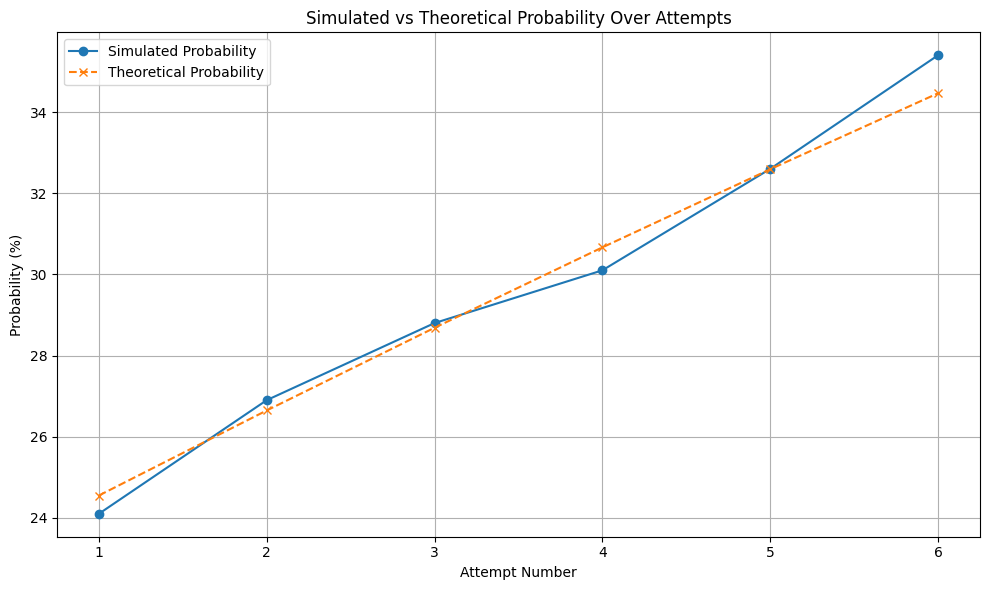

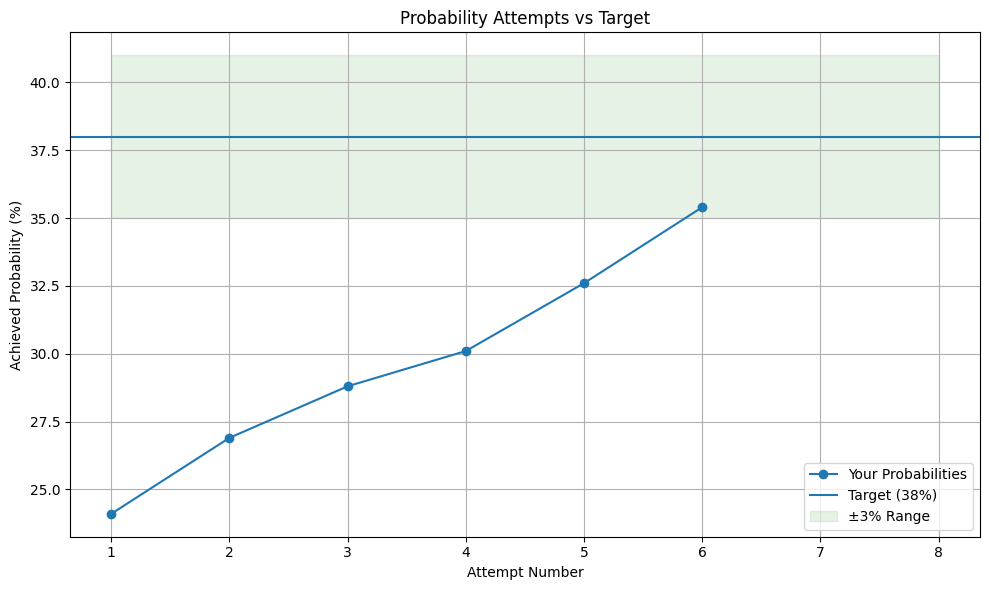

In [7]:
# The user is given a random target probability to match
int_target = random.randint(2, 100)
print(f"Your target percentage to get within 3% of is {int_target}%.")
target = int_target

# User sets fixed die settings
sides = 6
d1_value = int(input(f"Enter value for first die (≤ {sides}): "))
d2_value = int(input(f"Enter value for second die (≤ {sides}): "))
numTrials = int(input("Enter number of Monte Carlo trials (multiples of 10): "))

# Die rolling function
def rollDie(sides):
    return random.randint(1, sides)

# Monte Carlo simulation function
def MonteProb(rolls, d1_value, d2_value, sides):
    numwins = 0.0
    wins_per_trial = []

    for _ in range(numTrials):
        success = False
        for _ in range(rolls):
            d1 = rollDie(sides)
            d2 = rollDie(sides)
            if d1 == d1_value and d2 == d2_value:
                numwins += 1
                success = True
                break
        wins_per_trial.append(1 if success else 0)

    prob = (numwins / numTrials) * 100
    return prob, wins_per_trial

# Theoretical probability calculation
def actual_probability(rolls, sides):
    p_match = (1 / sides) * (1 / sides)
    actual = 1 - (1 - p_match) ** rolls
    return actual * 100

# Initialize tracking variables
attempt = 1
simulated_history = []
actual_history = []

# Start with a small number of rolls
rolls = 10
max_rolls = 1000
min_rolls = 1

# Auto-loop until computer finds a match
while True:
    print(f"\nAttempt #{attempt} with {rolls} rolls")

    prob, _ = MonteProb(rolls, d1_value, d2_value, sides)
    actual_prob = actual_probability(rolls, sides)

    simulated_history.append(prob)
    actual_history.append(actual_prob)

    print(f"Simulated Probability: {prob:.2f}%")
    print(f"Theoretical Probability: {actual_prob:.2f}%")

    if abs(prob - target) <= 3:
        print(f"\nSimulated probability {prob:.2f}% is within 3% of target {target}% on attempt #{attempt} with {rolls} rolls.")
        break
    else:
        # Adjust rolls intelligently
        if prob < target:
            rolls = min(rolls + 1, max_rolls)
        else:
            rolls = max(rolls - 1, min_rolls)

        attempt += 1

# Plot 1: Simulated vs Theoretical Probability over Attempts
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Simulated Probability")
plt.plot(range(1, attempt + 1), actual_history, marker='x', linestyle='--', label="Theoretical Probability")
plt.title("Simulated vs Theoretical Probability Over Attempts")
plt.xlabel("Attempt Number")
plt.ylabel("Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Attempts vs Target Probability
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Your Probabilities")
plt.axhline(y=target, linestyle='-', label=f"Target ({target}%)")
plt.fill_between(range(1, attempt + 3), target - 3, target + 3, color='green', alpha=0.1, label="±3% Range")

plt.title("Probability Attempts vs Target")
plt.xlabel("Attempt Number")
plt.ylabel("Achieved Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
